# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/hmchilders/eds220-hwk-3

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
**Read the metadata for both datsets and write a brief description about each once. Indicate the data sources and date of access.**

The first dataset, provided by the New York State Department of Environemntal Conservation, provide pertinent information about spills of oil and hazardous materials including what was spilled, where it was spilled, how much was spilled, and how long it took to clean up the spill. (Accessed on Nov. 9, 2023)

The second dataset, provided by the United States Census Bureau, contains the geospatial information for  counties in the United States with county names. (Accessed Nov.9, 2023)

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

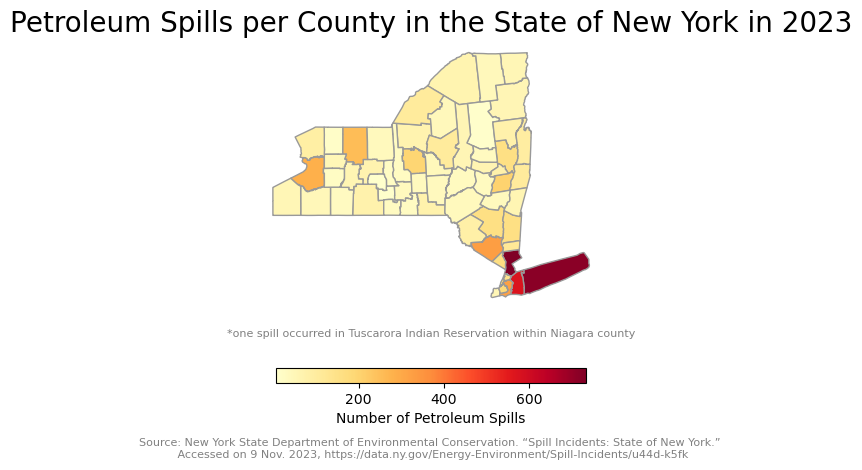

In [1]:
### ===== FINAL CODE =====

# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
# import numpy too
import numpy as np

### SPILL DATA ###

# Read in the spill data
spills = pd.read_csv('data/Spill_Incidents_20231109.csv')

#remove the spaces from the column names and replace them with underscores
spills.columns = spills.columns.str.replace(" ", "_")

#also make the column names lowercase
spills.columns = spills.columns.str.lower()

# Change the spill date columns from object to DateTime objects
spills.spill_date = pd.to_datetime(spills.spill_date)

#Create new dataframe named spills_per_county with the number of petroleum spills per county from January to October 2023.
petr_23 = spills[(spills['material_family']=='Petroleum')&(spills.spill_date > '2022-12-31')&(spills.spill_date < '2023-11-01')]

#Create new dataframe named spills_per_county with the number of petroleum spills per county from January to October 2023 
# Group the daya by county name and count the number of entries
spills_per_county = petr_23.groupby('county').count()
#reset the index so the index starts at zero
spills_per_county = spills_per_county.reset_index() 
# Select just the county name and spills columns
spills_per_county = spills_per_county[['county','spill_number']]
#change the coulm name from spill_number to n_spills
spills_per_county = pd.DataFrame(spills_per_county).rename(columns={'spill_number':'n_spills'})

###COUNTIES DATA###

#Read in the county geospatial data
counties = gpd.read_file('data/tl_2022_us_county/')

#Simplify column names as needed
counties.columns = counties.columns.str.lower()

# Looking at the metadata, the state code for new yoprk is 36, so we can filter the statefp column 
ny_counties = counties[counties.statefp == '36']

## MERGE DATA ##
#Fine the index of St. Lawrence
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
#Change the name of St Lawrence to St. Lawrence
spills_per_county.at[st_lawrence_index,'county'] = 'St. Lawrence'

#Rename the "name" column in ny_counties
spills_per_county = pd.DataFrame(spills_per_county).rename(columns={'county':'name'})

#Over-write ny_counties as the inner join of the spills_per_county and ny_counties dataframe
ny_counties = pd.merge(ny_counties,
                       spills_per_county,
                            how='inner',
                            on='name')

#Since the Tuscarora Indian Reservation does not appear in the ny_counties dataframe, 
#add one spill to Niagara county. We will add a note about this in our final map. 
#find the index for niagara county 
niagara_index = ny_counties[ny_counties.name == 'Niagara'].index[0]
#Add one spill
ny_counties.at[niagara_index, 'n_spills'] += 1

## MAKE A MAP ##
#Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023
# figsize updates the figure size
fig, ax = plt.subplots(figsize=(5, 5))
#Plot the data
ny_counties.plot(ax = ax,
                      column='n_spills',
                       cmap='YlOrRd',
                       legend=True,
                       edgecolor="0.6",
                       legend_kwds={"shrink":.8,
                                    'label': "Number of Petroleum Spills",
                                    'orientation': 'horizontal' 
                                    }
                       )
                       
# Add a Title
ax.set_title('Petroleum Spills per County in the State of New York in 2023',  fontsize=20)

# Remove the axes/Bounding box
ax.axis('off')

# Adding annotation to the middle of the map
ax.annotate('*one spill occurred in Tuscarora Indian Reservation within Niagara county',
            xy=(0.5, -0.1),
            xycoords='axes fraction',
            ha='center',
            fontsize=8,
           color = 'grey')

# Adding annotation to the bottom of the map
ax.annotate('Source: New York State Department of Environmental Conservation. “Spill Incidents: State of New York.” \n Accessed on 9 Nov. 2023, https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk',
            xy=(0.5, -0.55),
            xycoords='axes fraction',
            ha='center',
            fontsize=8,
           color = 'grey')

# Show the map
plt.show()

<!-- write your description in this markdwon cell -->

## Import libraries

In [2]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [3]:
# Read in the spill data
spills = pd.read_csv('data/Spill_Incidents_20231109.csv')

#Read in the county geospatial data
counties = gpd.read_file('data/tl_2022_us_county/')


In [4]:
#ensure the spills data was read in correctly
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [5]:
#ensure the counties data was read in correctly
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [6]:
# 1. Check the datafram's head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [7]:
# 2. Simplify the colomn names 
#remove the spaces from the column names and replace them with underscores
spills.columns = spills.columns.str.replace(" ", "_")
#also make the column names lowercase
spills.columns = spills.columns.str.lower()

In [8]:
# 3. Check the datatypes of the columns
spills.dtypes

spill_number               int64
program_facility_name     object
street_1                  object
street_2                  object
locality                  object
county                    object
zip_code                  object
swis_code                  int64
dec_region                 int64
spill_date                object
received_date             object
contributing_factor       object
waterbody                 object
source                    object
close_date                object
material_name             object
material_family           object
quantity                 float64
units                     object
recovered                float64
dtype: object

In [9]:
# 4. Check the unique values in the material_family column
spills.material_family.unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [10]:
# 5. Check the unique values in the county column
spills.county.unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex', 'Chenango',
       'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans', 'Ontario',
       'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung', 'Seneca',
       'Oneida', 'Broome', 'Hamilton', 'Washington', 'Schuyler',
       'Franklin', 'Columbia', 'Fulton', 'Herkimer', 'Schoharie',
       'Rensselaer', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Steuben', 'Tioga', 'Chautauqua',
       'Cattaraugus', 'Wyoming', 'Yates', 'Greene',
       'Pennsylvania - Region 9', 'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

In [11]:
spills.head()


,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [12]:
# Change the spill date columns from object to DateTime objects
spills.spill_date = pd.to_datetime(spills.spill_date)
#ensure the datatype was updates
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date                    object
contributing_factor              object
waterbody                        object
source                           object
close_date                       object
material_name                    object
material_family                  object
quantity                        float64
units                            object
recovered                       float64
dtype: object

In [13]:
spills.head()

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,2001-10-10,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,2002-08-02,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,2003-01-20,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [14]:
#Store as a variable petr_23
#Select only the petrolem spills
#Select the date range January 1st 2023, and October 31st 2023 (inclusive)
petr_23 = spills[(spills['material_family']=='Petroleum')&(spills.spill_date > '2022-12-31')&(spills.spill_date < '2023-11-01')]

#check to make sure your selections were correct
petr_23.head()

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil,Petroleum,0.0,Gallons,0.0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil (on-site consumption),Petroleum,0.0,NaN,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,Diesel (E-Gen),Petroleum,0.0,NaN,0.0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,waste oil/used oil,Petroleum,0.0,NaN,0.0


2. Verify that `petr_23` only has data for petroleum spills 

In [15]:
#Verify that petr_23 only has data for petroleum spills
petr_23.material_family.unique()

array(['Petroleum'], dtype=object)

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [16]:
# Verify that petr_23 only has data for 2023
petr_23.spill_date.dt.year.unique()

array([2023])

4. Verify that `petr_23` only has data from January to October. 

In [17]:
# Verify that petr_23 only has data from January to October.
petr_23.spill_date.dt.month.unique()

array([ 6,  8,  9,  7,  1,  2,  3, 10,  5,  4])

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [18]:
#Create new dataframe named spills_per_county with the number of petroleum spills per county from January to October 2023 
# Group the daya by county name and count the number of entries
spills_per_county = petr_23.groupby('county').count()
#reset the index so the index starts at zero
spills_per_county = spills_per_county.reset_index() 
# Select just the county name and spills columns
spills_per_county = spills_per_county[['county','spill_number']]
#change the coulm name from spill_number to n_spills
spills_per_county = pd.DataFrame(spills_per_county).rename(columns={'spill_number':'n_spills'})
#Display the results
spills_per_county

,county,n_spills
0,Albany,204
1,Allegany,30
2,Bronx,143
3,Broome,74
4,Cattaraugus,46
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,734
62,Wyoming,24


## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [19]:
# 1.Check the geo-dataframe's head
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [20]:
# 2.Simplify column names as needed
counties.columns = counties.columns.str.lower()
#check new head
counties.head()

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [21]:
# 3. Check the data types of the columns
counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp         object
cbsafp        object
metdivfp      object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [22]:
# 4. Check the geo-dataframe's CRS
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

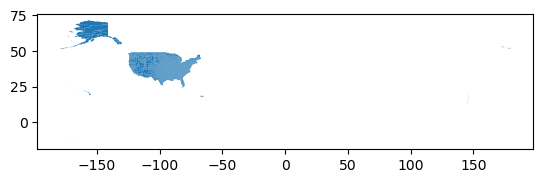

In [23]:
# 5. Plot the geo-dataframe
counties.plot()

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

<AxesSubplot:>

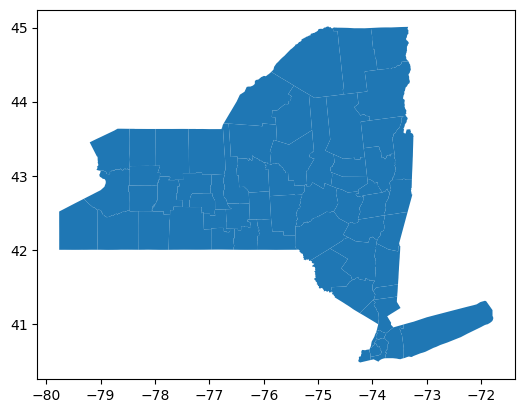

In [24]:
# Looking at the metadata, the state code for new yoprk is 36, so we can filter the statefp column 
ny_counties = counties[counties.statefp == '36']
#Then plot just the new york counties
ny_counties.plot()


## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [25]:
# 1. Print the names of counties in ny_counties, without repetition.
# Only select unique names 
ny_county_names = ny_counties.name.unique()
#print the array
print(np.sort(ny_county_names))

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New York' 'Niagara' 'Oneida' 'Onondaga'
 'Ontario' 'Orange' 'Orleans' 'Oswego' 'Otsego' 'Putnam' 'Queens'
 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga' 'Schenectady' 'Schoharie'
 'Schuyler' 'Seneca' 'St. Lawrence' 'Steuben' 'Suffolk' 'Sullivan' 'Tioga'
 'Tompkins' 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming'
 'Yates']


In [26]:
# 2.Print the names of counties in spills_per_county, without repetition. 
# Only select unique names 
spill_names = spills_per_county.county.unique()
#print the array
print(spill_names)

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


In [27]:
# 3. county names that are in spills_per_county, but not in ny_counties
np.setdiff1d(spill_names, ny_county_names)

array(['New Jersey - Region 2', 'St Lawrence',
       'Tuscarora Indian Reservation'], dtype=object)

In [28]:
# 4.Find the county names that are in ny_counties, but not in spills_per_county
np.setdiff1d(ny_county_names, spill_names)

array(['St. Lawrence'], dtype=object)

In [29]:
# 5. Check the number of spills in 'Tuscarora Indian Reservation'
spills_per_county[spills_per_county.county == 'Tuscarora Indian Reservation']

,county,n_spills
56,Tuscarora Indian Reservation,1


### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [30]:
# 1. 
spills_per_county[spills_per_county.county == 'St Lawrence']

,county,n_spills
50,St Lawrence,65


In [31]:
# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

Int64Index([50], dtype='int64')

In [32]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

50

In [33]:
# 4. Use st_lawrence_index update St Lawrence name 
spills_per_county.at[st_lawrence_index,'county'] = 'St. Lawrence'

In [34]:
# 5. Check that the update was successful 
spills_per_county.at[st_lawrence_index,'county']

'St. Lawrence'

### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [35]:
# 1. Rename the "name" column in ny_counties
spills_per_county = pd.DataFrame(spills_per_county).rename(columns={'county':'name'})
spills_per_county.head()

,name,n_spills
0,Albany,204
1,Allegany,30
2,Bronx,143
3,Broome,74
4,Cattaraugus,46


In [36]:
# 2. Over-write ny_counties as the inner join of the spills_per_county and ny_counties dataframe
ny_counties = pd.merge(ny_counties,
                       spills_per_county,
                            how='inner',
                            on='name')
ny_counties.head(10)

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
0,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,None,None,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
1,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,None,None,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",159
2,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
3,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,None,None,None,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
4,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,None,None,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",159
5,36,089,00977309,36089,St. Lawrence,St. Lawrence County,06,H1,G4020,None,None,None,A,6939601205,367206795,+44.4881125,-075.0743110,"POLYGON ((-74.64908 44.08834, -74.66684 44.086...",65
6,36,097,00974146,36097,Schuyler,Schuyler County,06,H1,G4020,None,None,None,A,850405403,36246373,+42.4197755,-076.9386030,"POLYGON ((-77.10711 42.48377, -77.10684 42.483...",11
7,36,031,00974114,36031,Essex,Essex County,06,H1,G4020,None,None,None,A,4646753187,316350563,+44.1096005,-073.7784307,"POLYGON ((-73.61820 43.78678, -73.62207 43.786...",56
8,36,103,00974149,36103,Suffolk,Suffolk County,06,H1,G4020,None,None,None,A,2359277250,3787418039,+40.9435540,-072.6922183,"POLYGON ((-71.80938 41.20323, -71.79115 41.184...",719
9,36,041,00974119,36041,Hamilton,Hamilton County,06,H1,G4020,None,None,None,A,4447989312,234204425,+43.6578786,-074.5024556,"POLYGON ((-74.20976 43.24926, -74.21149 43.249...",9


In [37]:
#Since the Tuscarora Indian Reservation does not appear in the ny_counties dataframe, 
#add one spill to Niagara county. We will add a note about this in our final map. 
#find the index for niagara county and see how many spills it has
ny_counties[ny_counties.name == 'Niagara']
#Add one spill
ny_counties.at[45, 'n_spills'] += 1
#verify that the dataframe was updated.
ny_counties[ny_counties.name == 'Niagara']

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
45,36,063,00974130,36063,Niagara,Niagara County,06,H1,G4020,None,None,None,A,1352887560,1598842379,+43.2726719,-078.8129431,"POLYGON ((-78.49165 43.08396, -78.49179 43.084...",89


## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

In [38]:
ny_counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

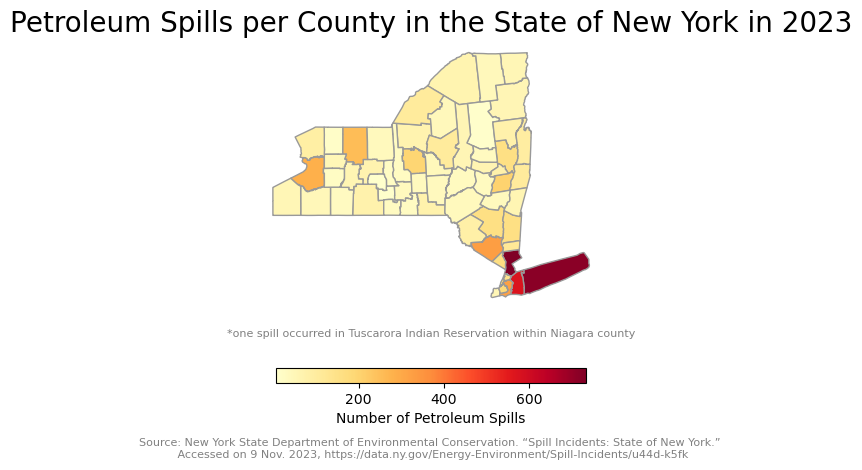

In [39]:
#Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023
fig, ax = plt.subplots(figsize=(5, 5))
ny_counties.plot(ax = ax,
                      column='n_spills',
                       cmap='YlOrRd',
                       legend=True,
                       edgecolor="0.6",
                       legend_kwds={"shrink":.8,
                                    'label': "Number of Petroleum Spills",
                                    'orientation': 'horizontal' 
                                    }
                       )
                       

ax.set_title('Petroleum Spills per County in the State of New York in 2023',  fontsize=20)
ax.axis('off')
# Adding annotation to the bottom of the map
ax.annotate('*one spill occurred in Tuscarora Indian Reservation within Niagara county',
            xy=(0.5, -0.1),
            xycoords='axes fraction',
            ha='center',
            fontsize=8,
           color = 'grey')
ax.annotate('Source: New York State Department of Environmental Conservation. “Spill Incidents: State of New York.” \n Accessed on 9 Nov. 2023, https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk',
            xy=(0.5, -0.55),
            xycoords='axes fraction',
            ha='center',
            fontsize=8,
           color = 'grey')

plt.show()

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.